In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder,MinMaxScaler
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [2]:
data=pd.read_csv("Python Project/insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


CHECKING FOR MISSING VALUES


In [5]:
data.isnull().sum()/len(data)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [6]:
data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [7]:
data.shape

(1338, 7)

In [8]:
scaler=MinMaxScaler()
LE=LabelEncoder()

In [9]:
data['smoker']=LE.fit_transform(data['smoker'])
data['sex']=LE.fit_transform(data['sex'])
data['region']=LE.fit_transform(data['region'])

Smoker Yes=1 and Smoker No=0
NorthWest=1, SouthEast=2, SouthWest=3, NorthEast=4

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [11]:
data.shape

(1338, 7)

In [12]:
corr=data.corr()

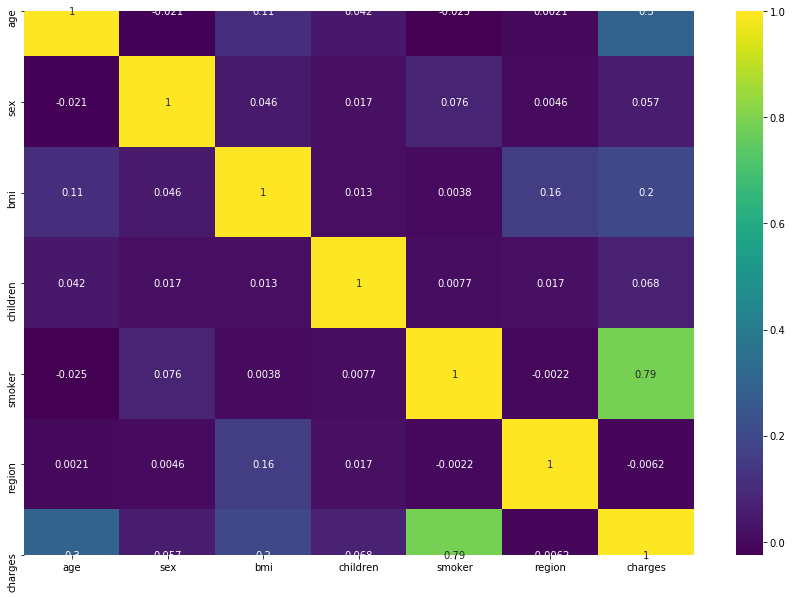

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='viridis')

In [14]:
data1=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [15]:
data1.head(10)

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816
5,0.282609,0.0,0.263115,0.0,0.0,0.666667,0.042056
6,0.608696,0.0,0.470272,0.2,0.0,0.666667,0.113629
7,0.413043,0.0,0.316922,0.6,0.0,0.333333,0.098320
8,0.413043,1.0,0.373150,0.4,0.0,0.000000,0.084352
9,0.913043,0.0,0.265806,0.0,0.0,0.333333,0.443765


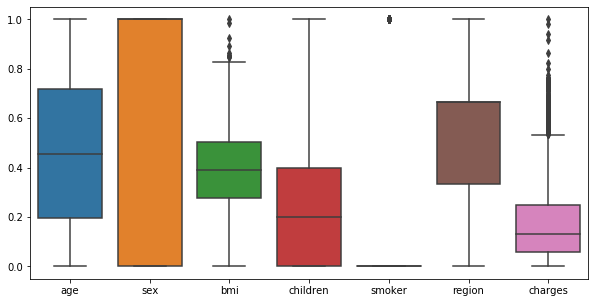

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data1)

In [17]:
mean=np.mean(data1['charges'])
std=np.std(data1['charges'])
upper=mean+3*std
lower=mean-3*std

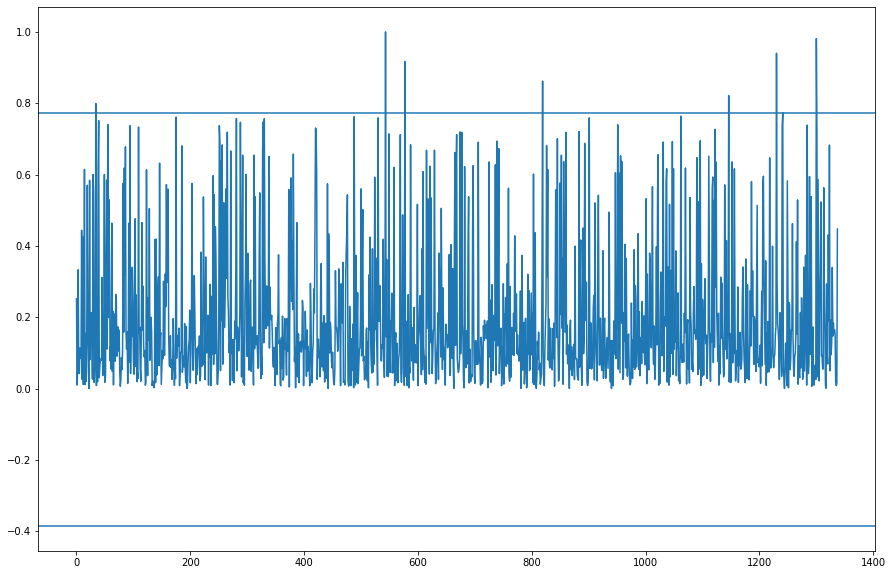

In [18]:
plt.figure(figsize=(15,10))
plt.axhline(upper)
plt.axhline(lower)
plt.plot(data1['charges'])

In [19]:
x_train,x_test,y_train,y_test=train_test_split(data.iloc[:,:-1],data['charges'],test_size=0.2,random_state=30)

In [20]:
model=LinearRegression(fit_intercept=True,n_jobs=6)
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=6, normalize=False)

In [21]:
y_pred=model.predict(x_test)

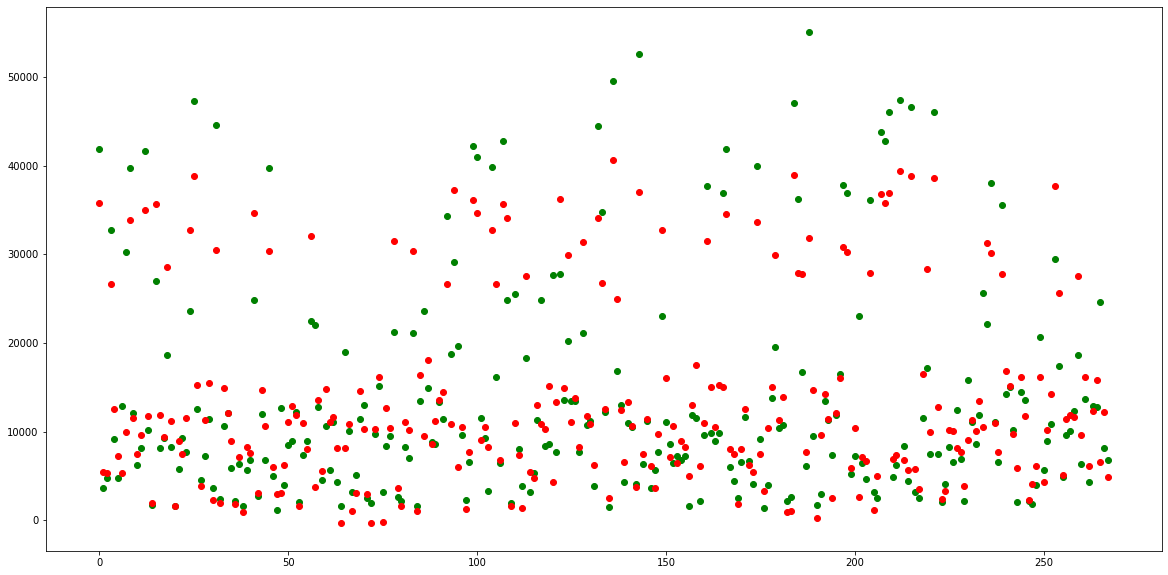

In [22]:
plt.figure(figsize=(20,10))
plt.scatter(range(268),y_test,color='green')
plt.scatter(range(268),y_pred,color='red')

In [23]:
y_test.shape

(268,)

In [24]:
r2_score(y_test,y_pred)

0.76023445990101

In [25]:
mean_absolute_error(y_test,y_pred)

4178.116485416852

In [26]:
coefficients=pd.DataFrame(data=model.coef_,columns=['Coeff'])
coefficients['intercept']=model.intercept_

In [27]:
coefficients

,Coeff,intercept
0,266.759764,-11664.49892
1,-399.759703,-11664.49892
2,322.962775,-11664.49892
3,425.024568,-11664.49892
4,23630.031728,-11664.49892
5,-374.477080,-11664.49892


In [28]:
residuals=y_test-y_pred

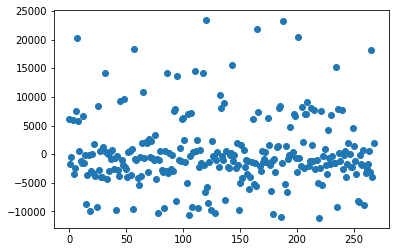

In [29]:
plt.scatter(range(268),residuals)

In [30]:
x=data.drop(['charges','sex'],axis=1)
y=data.charges
x=sm.add_constant(x)


C:\Users\Dell G3\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=30)

In [32]:
model1=sm.OLS(y_train1,x_train1).fit()

In [33]:
y_pred1=model1.predict(x_test1)

In [34]:
r2_score(y_test1,y_pred1)

0.7617226190500178

In [35]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     629.1
Date:                Fri, 28 Feb 2020   Prob (F-statistic):          1.05e-314
Time:                        23:40:10   Log-Likelihood:                -10834.
No. Observations:                1070   AIC:                         2.168e+04
Df Residuals:                    1064   BIC:                         2.171e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.181e+04   1057.960    -11.160      0.0

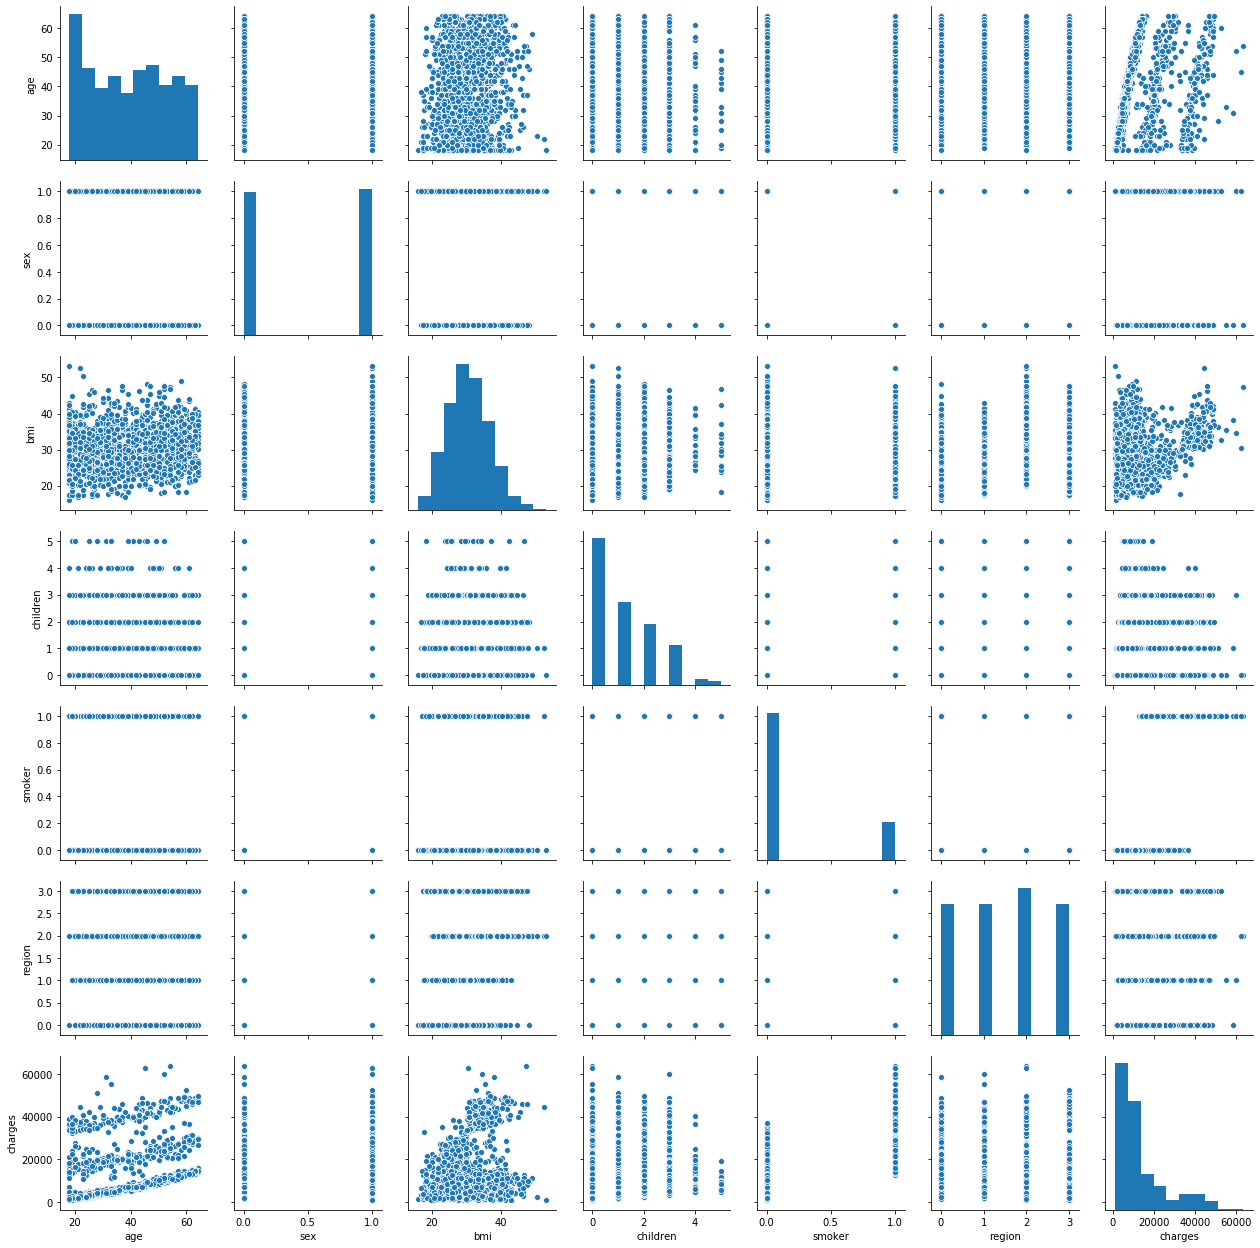

In [36]:
sns.pairplot(data)

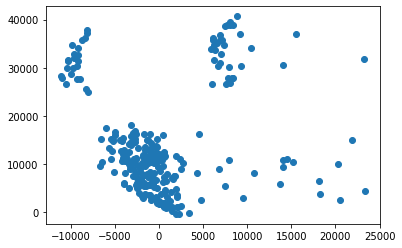

In [37]:
plt.scatter(residuals,y_pred)

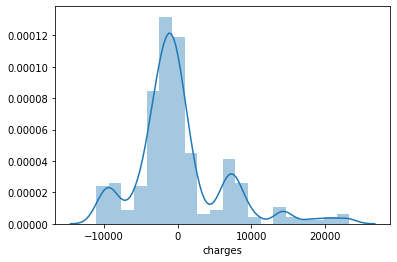

In [38]:
sns.distplot(residuals,kde=True,bins=20)

In [39]:
data.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

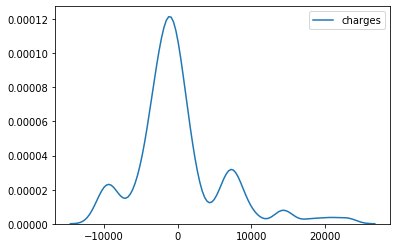

In [40]:
sns.kdeplot(residuals)

In [43]:
residuals_sq=residuals**2


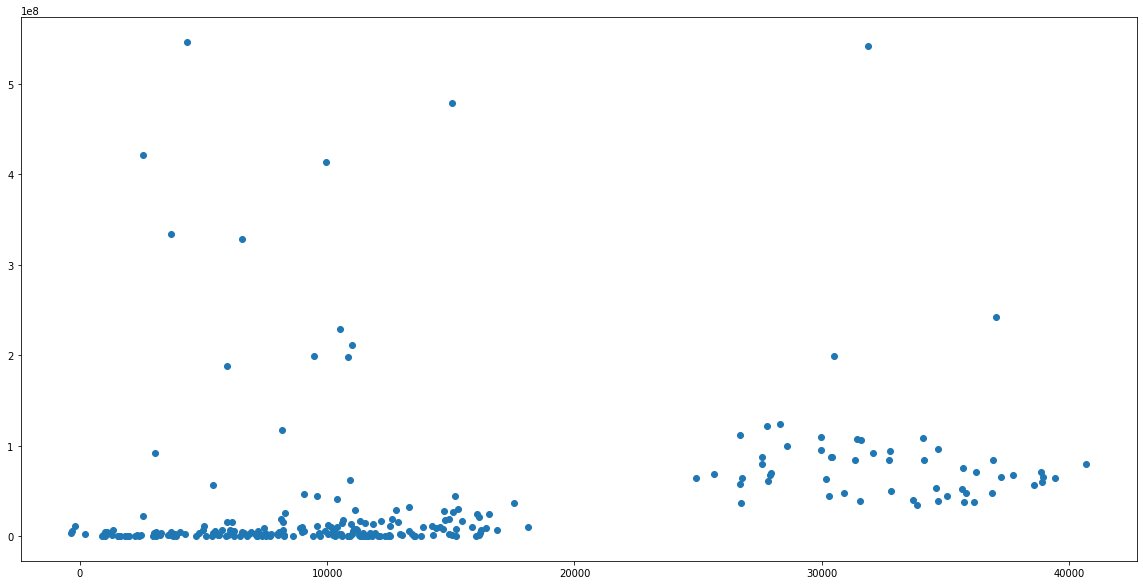

In [50]:
plt.figure(figsize=(20,10))
plt.scatter(y_pred,residuals_sq)

1. NO autocorrelation
2. NO Heteroscedasticity 
3. No multicollinearity
4. Residuals follow normal dist.
